In [3]:
import glob
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import numpy as np
import os
import pandas as pd

basedir = os.path.join('Y:\\', 'Dissertation')
evaldir = 'count_evals'
evalpath = os.path.join(basedir, evaldir)

dimensions = ["500", "300", "200", "100", "50"]
windows = ["1", "2", "3","4", "5", "6"]

In [4]:
# Get top per algo
tops = []


In [5]:
                                                                                                                                                               # Load wiki
file = os.path.join(evalpath,"wiki_top_3_per_algo.csv")
df = pd.read_csv(file, header=0)

#calculate simplest per language
langs = list(set(df['Language'].tolist()))
langs.sort()

simplest = list()

for lang in langs:
    sdf = pd.DataFrame(df.loc[df['Language'] == lang])
    # There better be six rows here. Sort by highest score, lowest dimension, lowest window
    sdf.sort_values(by=['Score',"Dimensions","Window"], ascending=[False, True, True], inplace=True)
    simplest.append(sdf.iloc[0].tolist())
    
simplest_df = pd.DataFrame(simplest)
simplest_df.columns = df.columns
tops.append(simplest_df)


In [6]:
# Load subs
file = os.path.join(evalpath,"subs_top_3_per_algo.csv")
df = pd.read_csv(file, header=0)

#calculate simplest per language
langs = list(set(df['Language'].tolist()))
langs.sort()

simplest = list()

for lang in langs:
    sdf = pd.DataFrame(df.loc[df['Language'] == lang])
    # There better be six rows here. Sort by highest score, lowest dimension, lowest window
    sdf.sort_values(by=['Score',"Dimensions","Window"], ascending=[False, True, True], inplace=True)
    simplest.append(sdf.iloc[0].tolist())
    
simplest_df = pd.DataFrame(simplest)
simplest_df.columns = df.columns
tops.append(simplest_df)

In [7]:
tops_df = pd.concat(tops)
tops_df.sort_values(by=['Language', 'Score'], ascending=[True,False], inplace=True)
display(tops_df)

groups = tops_df.groupby('Algorithm')


,Unnamed: 0,Language,Dimensions,Window,Algorithm,Score
0,46,af,300,6,cbow,0.091156
0,4,af,50,3,cbow,0.002216
1,8,ar,50,5,cbow,0.000008
1,8,ar,50,5,cbow,-0.000002
2,15,bg,100,2,sg,0.000101
...,...,...,...,...,...,...
52,2,uk,50,2,cbow,0.000040
53,11,ur,50,6,sg,0.000025
53,8,ur,50,5,cbow,-0.000757
54,0,vi,50,1,cbow,0.012186


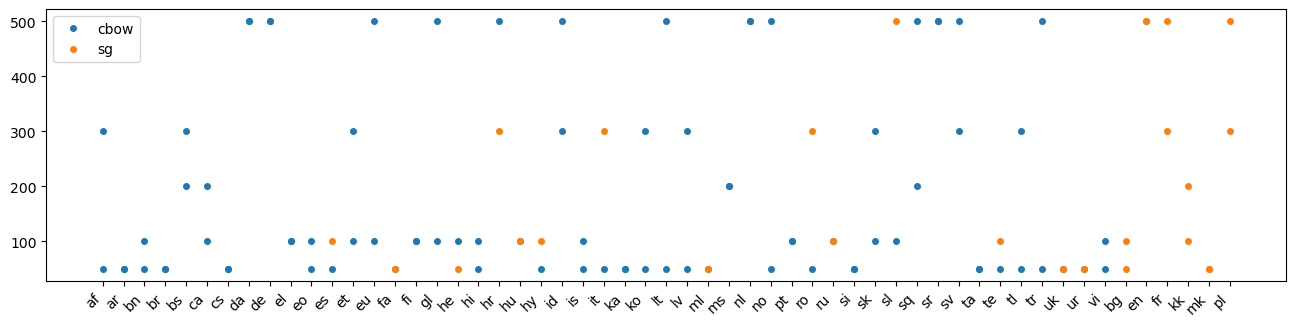

In [8]:
# Plot
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
fig.autofmt_xdate(rotation=45)

for name, group in groups:
    ax.plot(group.Language, group.Dimensions, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()


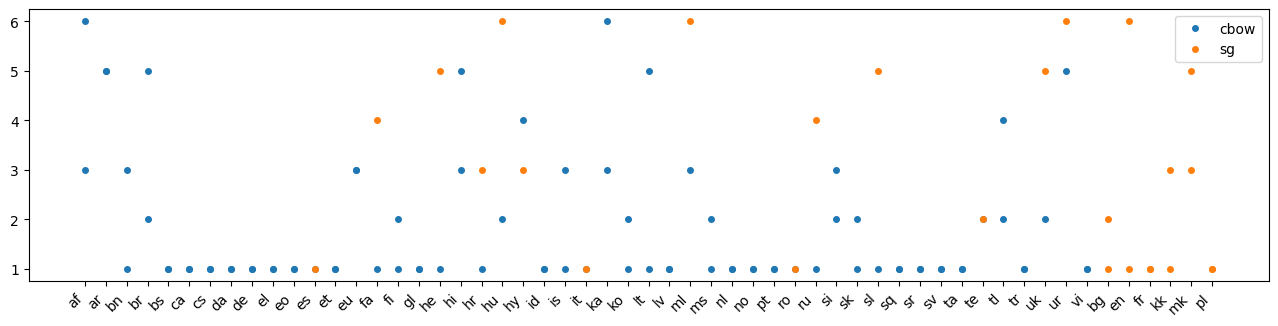

In [9]:
# Plot
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
fig.autofmt_xdate(rotation=45)

for name, group in groups:
    ax.plot(group.Language, group.Window, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()


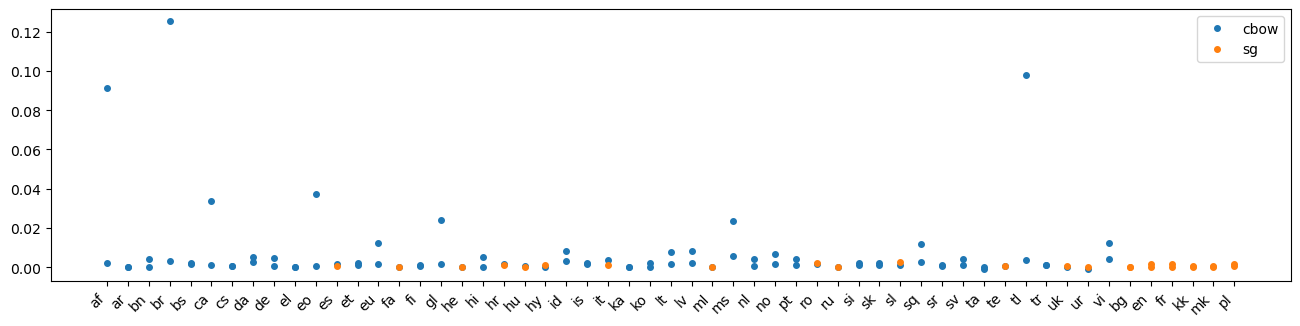

In [10]:

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
fig.autofmt_xdate(rotation=45)

for name, group in groups:
    ax.plot(group.Language, group.Score, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()


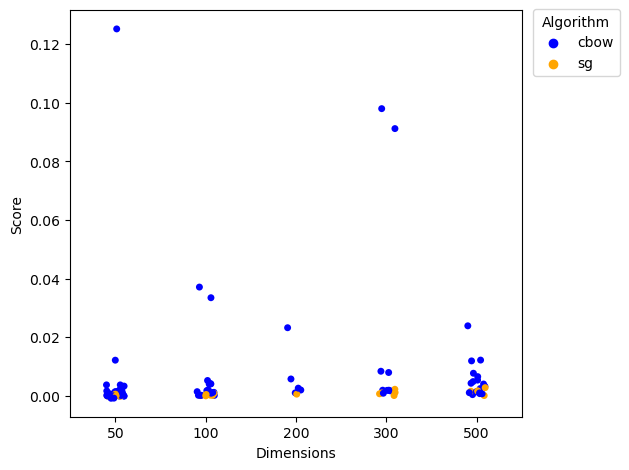

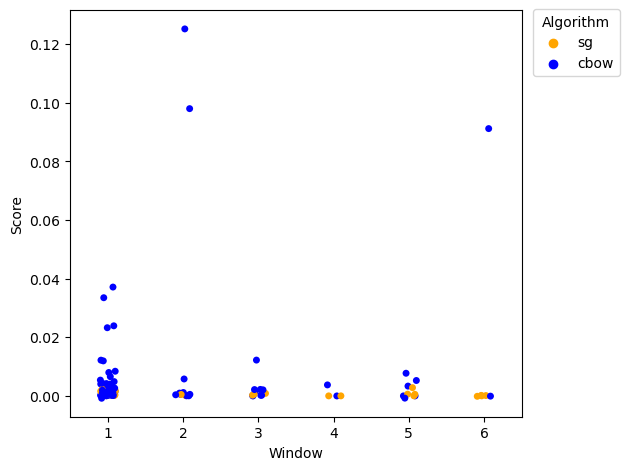

In [11]:
import seaborn as sns

#df_long = tops_df.melt(id_vars='Dimensions', var_name='Score', value_name='Prediction Score')
colors = {'cbow':'blue', 'sg':'orange'}

ax = sns.stripplot(data=tops_df, x='Dimensions', y='Score', hue='Algorithm', palette=colors)
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left', title='Algorithm')
plt.tight_layout()
plt.show()

ax = sns.stripplot(data=tops_df, x='Window', y='Score', hue='Algorithm', palette=colors)
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left', title='Algorithm')
plt.tight_layout()
plt.show()
